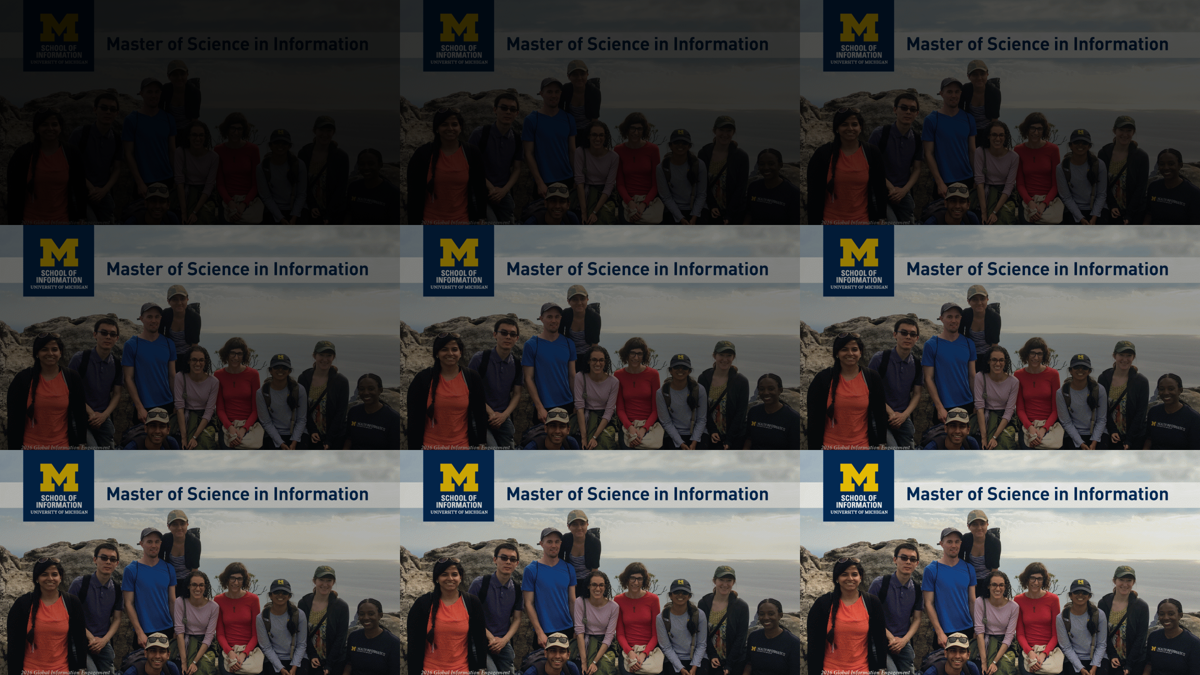

In [1]:
import PIL
from PIL import Image
from PIL import ImageEnhance

# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')

# build a list of 9 images which have different brightnesses
enhancer=ImageEnhance.Brightness(image)
images=[]
for i in range(1, 10):
    images.append(enhancer.enhance(i/10))

# create a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)

In [2]:
from PIL import ImageDraw
red_chanel=[]
green_chanel=[]
blue_chanel=[]
for x in range(3):
    red_chanel.append(image)
    green_chanel.append(image)
    blue_chanel.append(image)
    
from PIL import Image, ImageDraw, ImageFont

intensity=('intensity 0.1','intensity 0.5','intensity 0.9')
fnt = ImageFont.truetype("readonly/fanwood-webfont.ttf", 50)
i=0
for img in red_chanel:
    background=PIL.Image.new(image.mode, (image.width,image.height+50))
    background.paste(img, (0, 0))
    txt= ImageDraw.Draw(background)
    txt.text((0,450),"channel 0 "+intensity[i],fill='white', font=fnt)
    red_chanel[i]=background
    i=i+1
i=0
for img in green_chanel:
    background=PIL.Image.new(image.mode, (image.width,image.height+50))
    background.paste(img, (0, 0))
    txt= ImageDraw.Draw(background)
    txt.text((0,450),"channel 1 "+intensity[i],fill='white', font=fnt)
    green_chanel[i]=background
    i=i+1
i=0
for img in blue_chanel:
    background=PIL.Image.new(image.mode, (image.width,image.height+50))
    background.paste(img, (0, 0))
    txt= ImageDraw.Draw(background)
    txt.text((0,450),"channel 2 "+intensity[i],fill='white', font=fnt)
    blue_chanel[i]=background
    i=i+1

    

In [3]:
matrix = ( 1, 0, 0, 0,
          0, 1, 0, 0,
          0, 0, 1, 0)
red=( 0.1, 0, 0, 0,
          0, 1, 0, 0,
          0, 0, 1, 0)
green=( 1, 0, 0, 0,
          0, 0.1, 0, 0,
          0, 0, 1, 0)
blue=( 1, 0, 0, 0,
          0, 1, 0, 0,
          0, 0, 0.1, 0)
for i in range(3):
    rednew=red[0]
    greennew=green[5]
    bluenew=blue[10]
    red_chanel[i]=(red_chanel[i].convert('RGB',red))
    green_chanel[i]=(green_chanel[i].convert('RGB',green))
    blue_chanel[i]=(blue_chanel[i].convert('RGB',blue))
    
    rednew=rednew+0.4
    greennew=greennew+0.4
    bluenew=bluenew+0.4
    
    red=( rednew, 0, 0, 0,
          0, 1, 0, 0,
          0, 0, 1, 0)
    green=( 1, 0, 0, 0,
          0, greennew, 0, 0,
          0, 0, 1, 0)
    blue=( 1, 0, 0, 0,
          0, 1, 0, 0,
          0, 0, bluenew, 0)


In [4]:
red_sheet=PIL.Image.new(image.mode, (image.width*3,image.height+50))
green_sheet=PIL.Image.new(image.mode, (image.width*3,image.height+50))
blue_sheet=PIL.Image.new(image.mode, (image.width*3,image.height+50))
x=0
y=0
for img in red_chanel:
    red_sheet.paste(img,(x,y))
    x=x+800
red_sh = red_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/6) ))
x=0
for img in green_chanel:
    green_sheet.paste(img,(x,y))
    x=x+800
green_sh = green_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/6) ))
x=0
for img in blue_chanel:
    blue_sheet.paste(img,(x,y))
    x=x+800
blue_sh = blue_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/6) ))

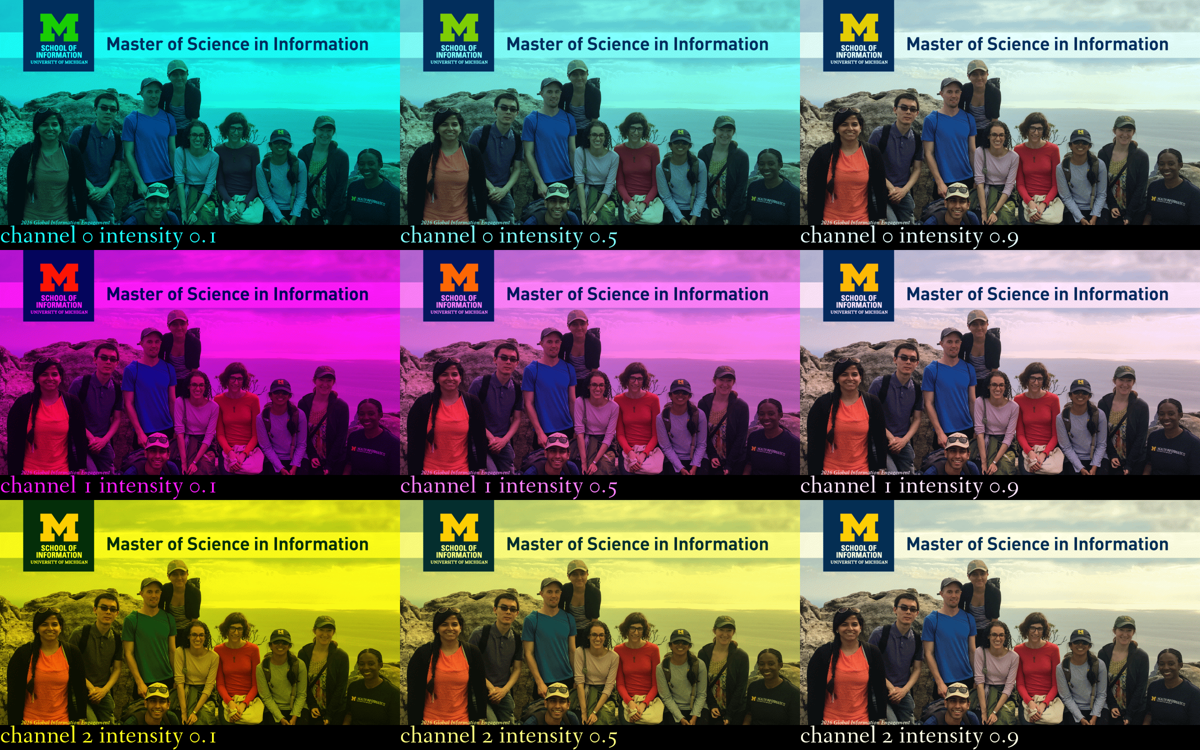

In [5]:
final_sheet=PIL.Image.new(image.mode, (image.width*3,(image.height*3)+150))
final_sheet.paste(red_sheet,(0,0))
final_sheet.paste(green_sheet,(0,500))
final_sheet.paste(blue_sheet,(0,1000))
final_sheet=final_sheet.resize((int(final_sheet.width/2),int(final_sheet.height/2) ))
display(final_sheet)
final_sheet.save("result.png")